python   处理mpstat的输出的脚本文件

In [105]:
def filter_mpstat_data(source_file, target_file):
    try:
        # 读取文件内容
        with open(source_file, 'r') as file:
            mpstat_str = file.read()

        # 将字符串按行分割
        lines = mpstat_str.strip().split('\n')

        # 初始化一个列表，用于存储过滤后的数据行
        filtered_lines = []

        # 遍历每一行，进行过滤
        for line in lines:
            # 删除空行
            if not line.strip():
                continue
            # 删除标题行
            if line.startswith("CPU") or line.startswith("Average:"):
                continue
            if 'CPU' in line or 'all' in line:
                continue
            # 删除参数不足的行
            parts = line.split()
            if len(parts) < 13:
                continue
            # 添加过滤后的行到列表中
            filtered_lines.append(line)

        # 将过滤后的数据行合并为一个字符串
        filtered_mpstat_str = "\n".join(filtered_lines)

        # 将预处理后的数据写入新文件
        with open(target_file, 'w') as filtered_file:
            filtered_file.write(filtered_mpstat_str)

        print(f"Filtered data has been written to '{target_file}'")

    except FileNotFoundError:
        print(f"Source file '{source_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [106]:
filter_mpstat_data('mo.txt', 'filtered_monitor.txt')

Filtered data has been written to 'filtered_monitor.txt'


In [107]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [108]:
def parse_mpstat_data(file_path):
    try:
        # 读取文件内容
        with open(file_path, 'r') as file:
            mpstat_str = file.read()

        # 将字符串按行分割
        lines = mpstat_str.strip().split('\n')

        # 初始化一个列表，用于存储所有解析后的字典
        data_list = []

        # 遍历每一行，解析数据
        for line in lines:
            # 跳过空行和标题行
            if not line.strip() or line.startswith("Average:") or line.startswith("CPU") or "ALL" in line:
                continue

            parts = line.split()
            if len(parts) < 13:
                continue

            # 提取时间、CPU编号和使用率数据
            time_str = parts[0] + " " + parts[1]
            cpu = parts[2]
            usr = parts[3]
            nice = parts[4]
            sys = parts[5]
            iowait = parts[6]
            irq = parts[7]
            soft = parts[8]
            steal = parts[9]
            guest = parts[10]
            gnice = parts[11]
            idle = parts[12]

            # 尝试将时间字符串转换为datetime对象
            try:
                time = datetime.strptime(time_str, '%I:%M:%S %p')
            except ValueError:
                print(f"Error parsing time: {time_str}")
                continue

            # 尝试将%idle转换为浮点数
            try:
                idle_value = float(idle.strip().replace('%', ''))
            except ValueError:
                print(f"Error converting '%idle' to float for CPU {cpu}: {idle}")
                continue

            # 创建字典并添加到列表中
            data_dict = {
                "time": time,
                "CPU": cpu,
                "%usr": usr,
                "%nice": nice,
                "%sys": sys,
                "%iowait": iowait,
                "%irq": irq,
                "%soft": soft,
                "%steal": steal,
                "%guest": guest,
                "%gnice": gnice,
                "%idle": idle_value
            }
            data_list.append(data_dict)

        return data_list

    except FileNotFoundError:
        print(f"Source file '{file_path}' not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


def plot_cpu_idle_usage(data_list, cpu_num,mode='%idle'):
    # 过滤出指定CPU的数据
    cpu_data = [data for data in data_list if data["CPU"] == str(cpu_num)]
  
    
    # 创建%idle值列表
    idle_values = [data[mode] for data in cpu_data]

    indices = list(range(len(idle_values)))
 
    plt.figure(figsize=(10, 6))
    plt.plot(indices, idle_values, label=f'CPU {cpu_num}')
  
    plt.xticks(indices)
    
    plt.title(f'CPU {cpu_num} {mode} Usage Over Time')
    plt.xlabel('Index')
    plt.ylabel(mode)
    plt.legend()
    plt.grid(True)
    plt.show()

Filtered data has been written to 'filtered_monitor_phy.txt'


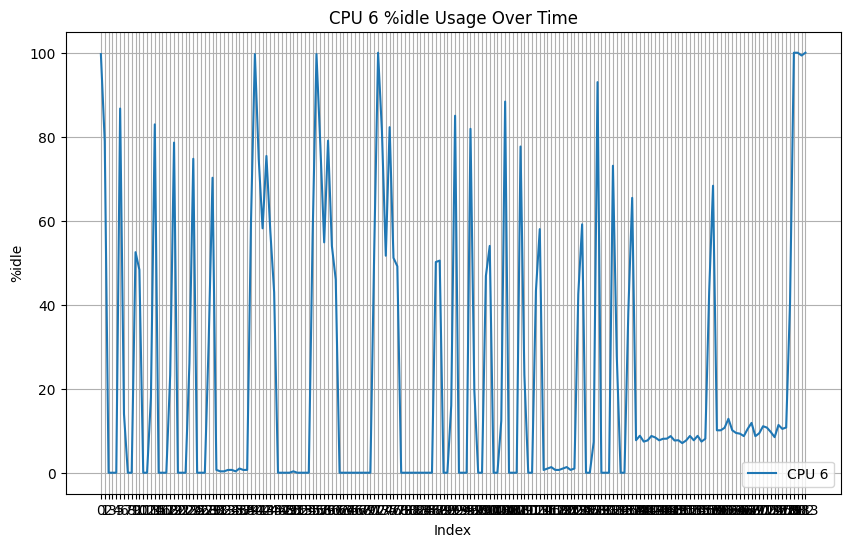

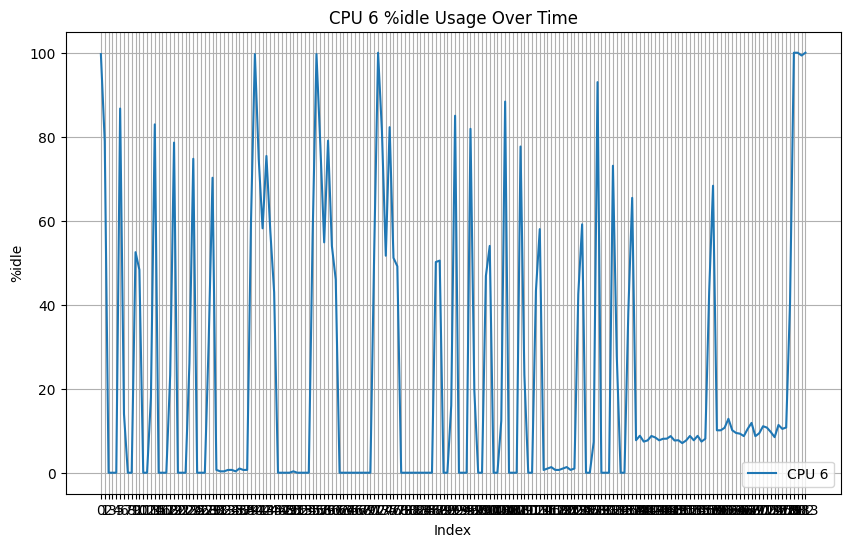

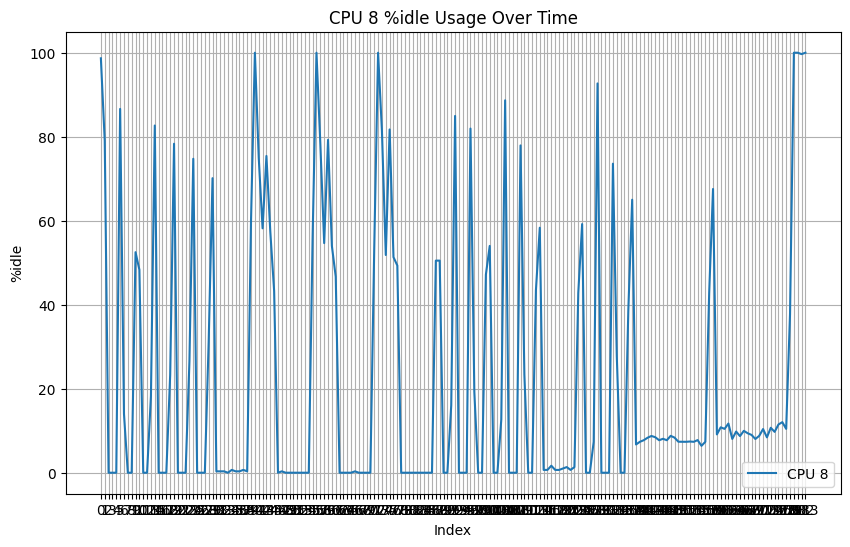

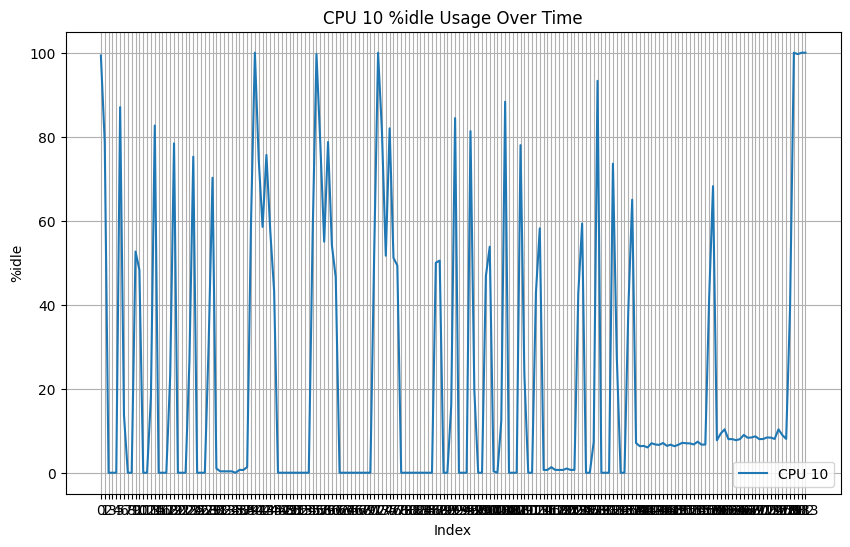

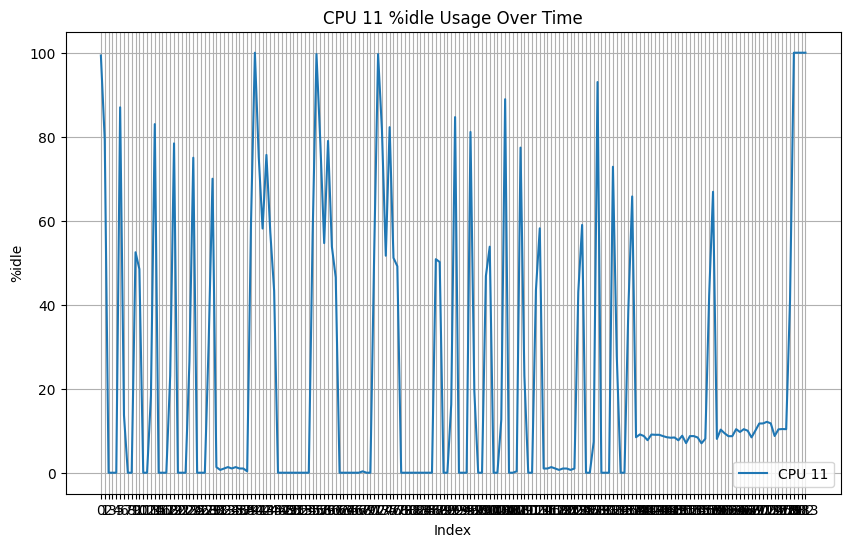

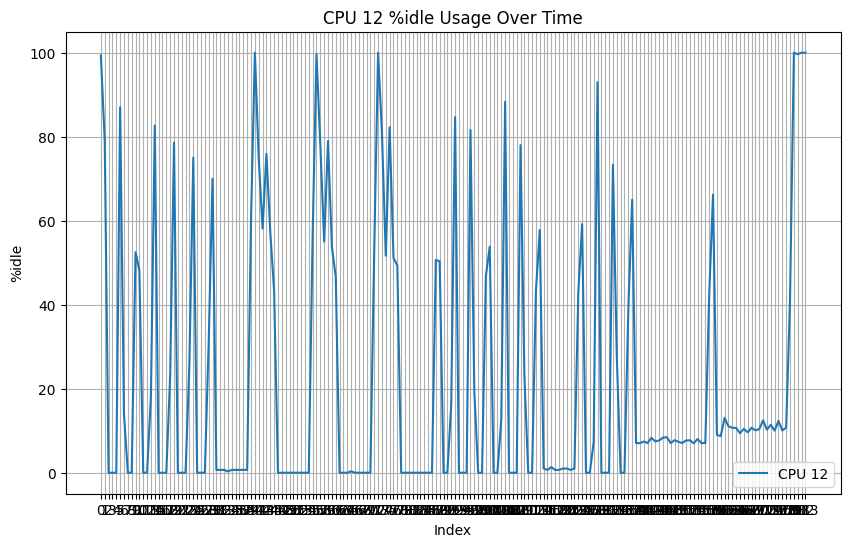

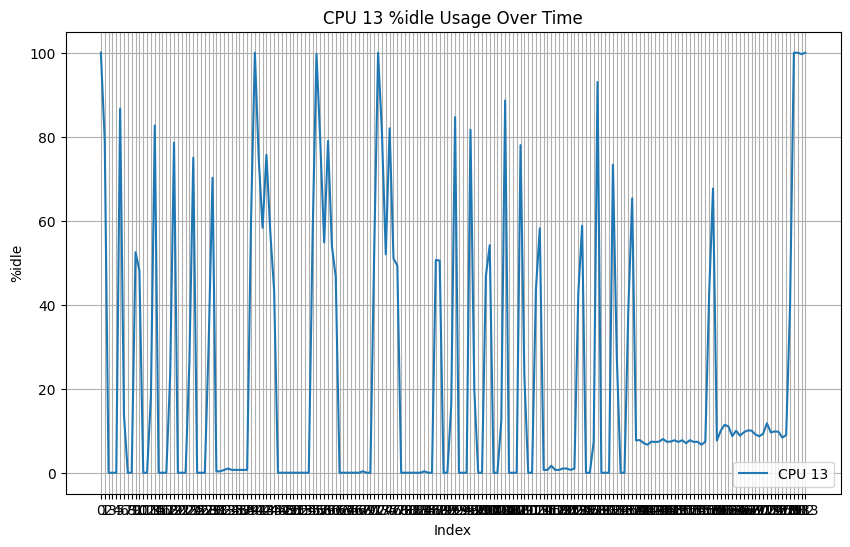

In [110]:
#测试用物理机器的数据        172.25.16.2
filter_mpstat_data('moho.txt', 'filtered_monitor_phy.txt')
data_list = parse_mpstat_data("filtered_monitor_phy.txt")
plot_cpu_idle_usage(data_list, 6)#6-13
for i in range(8):
    plot_cpu_idle_usage(data_list, (6+i),"%idle")
    


Filtered data has been written to 'filtered_monitor_host.txt'


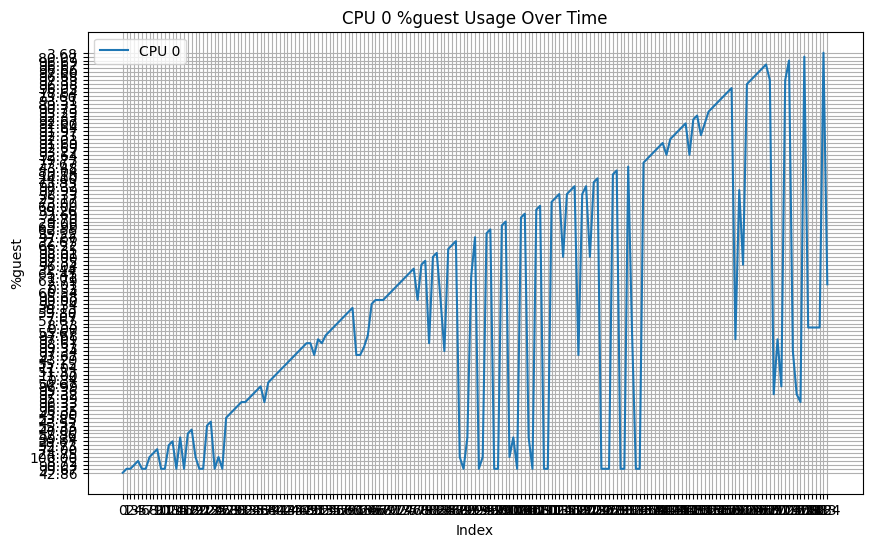

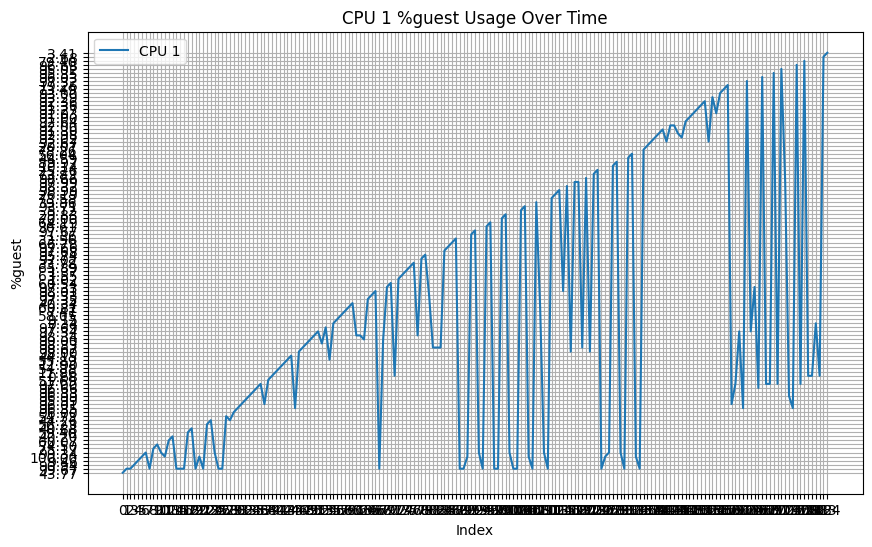

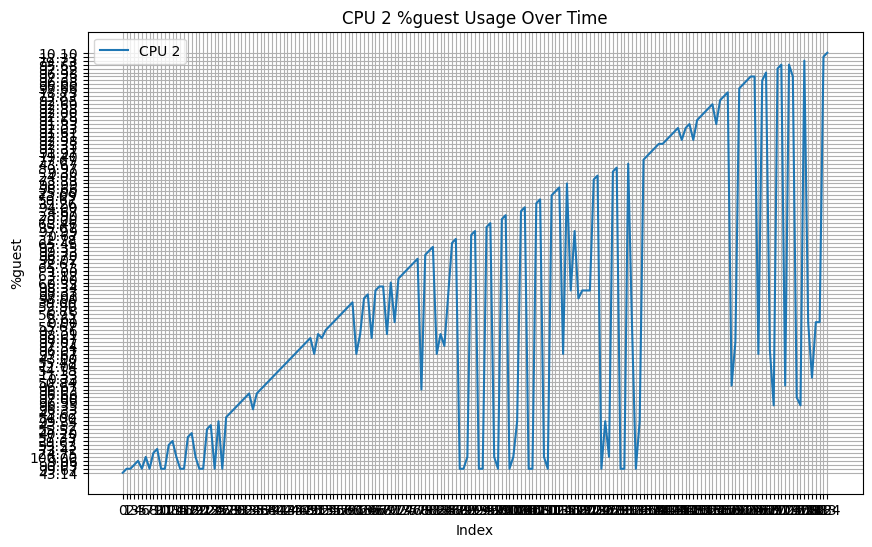

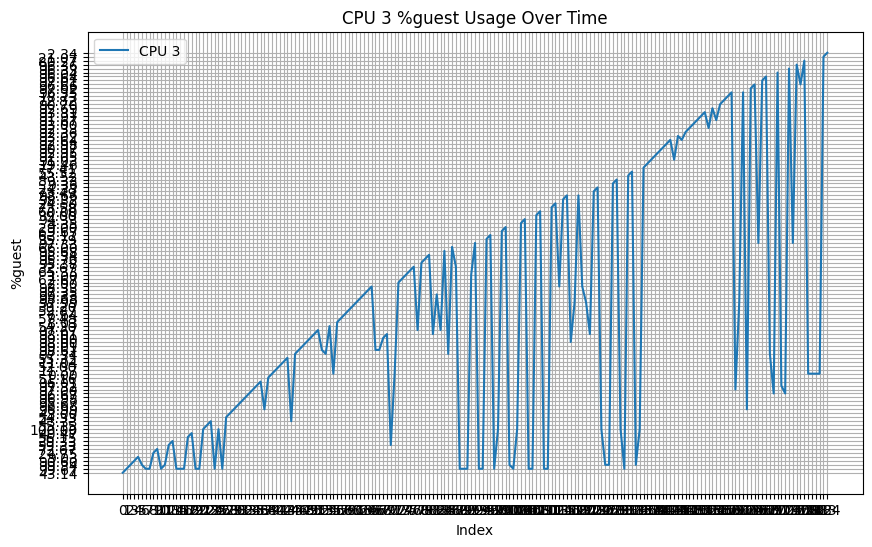

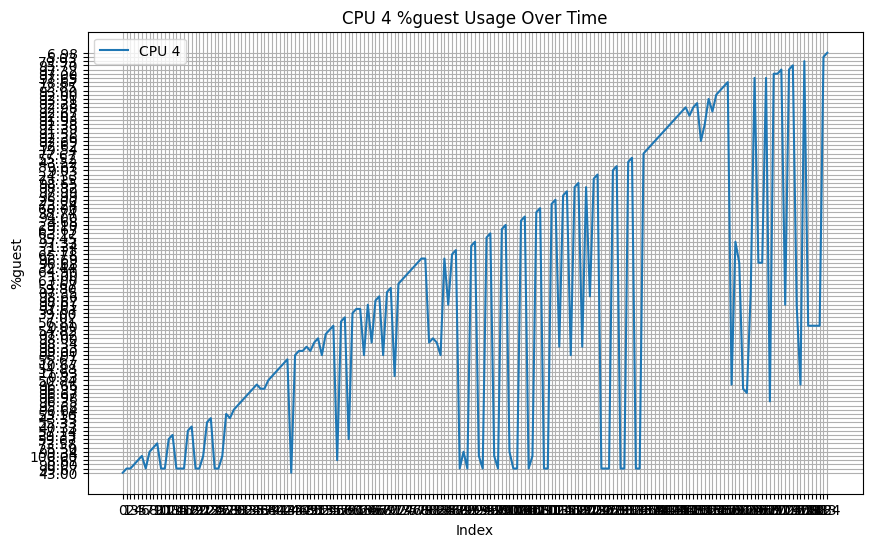

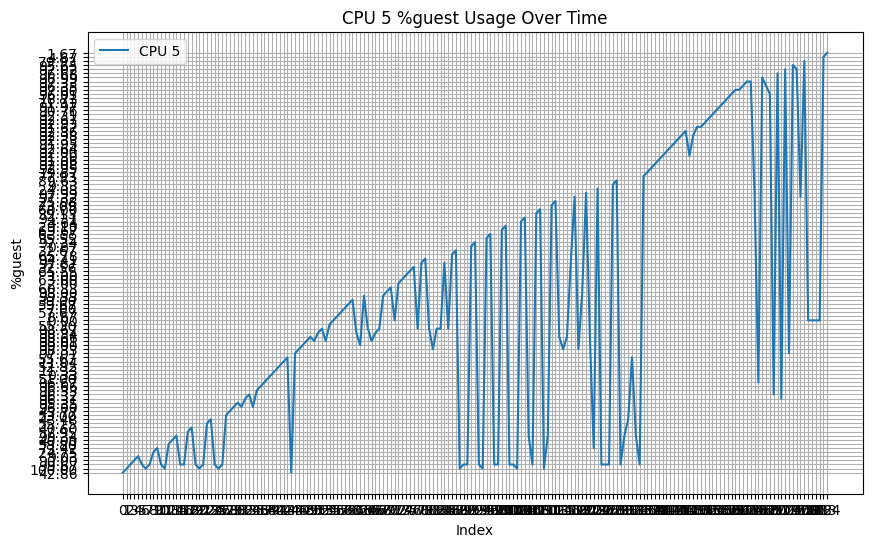

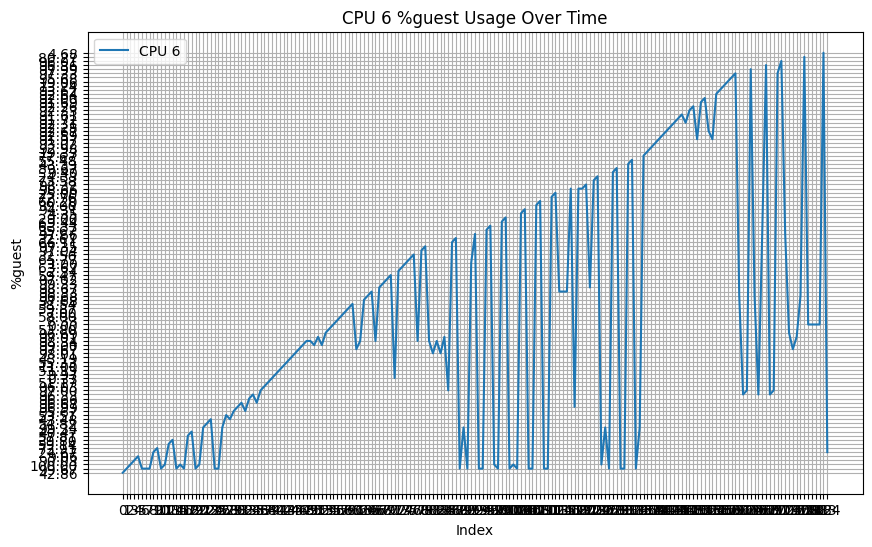

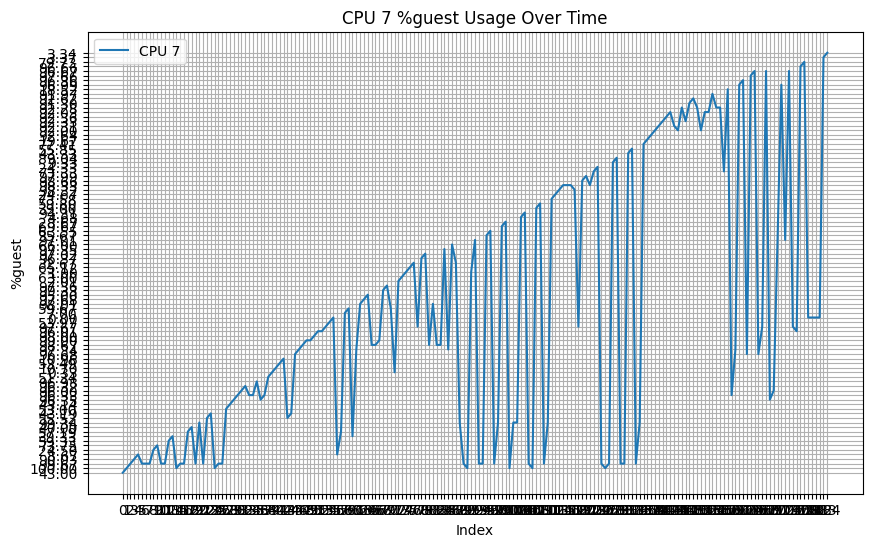

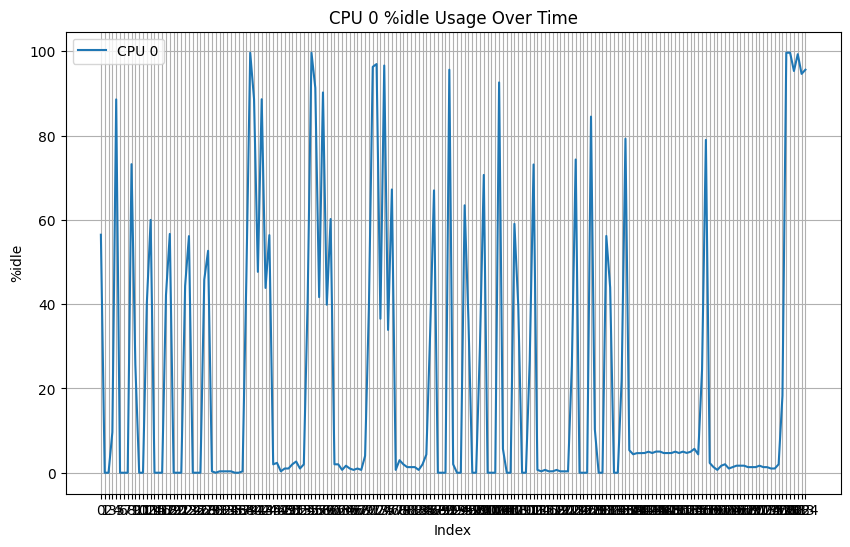

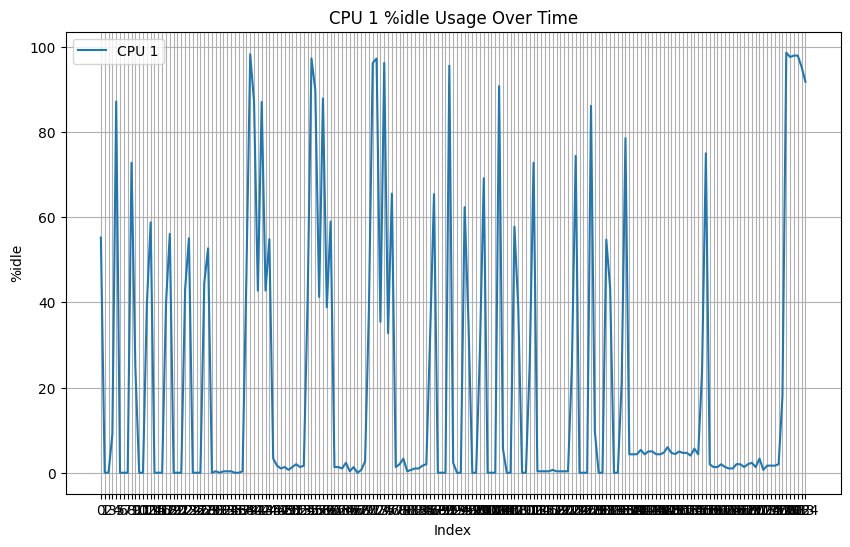

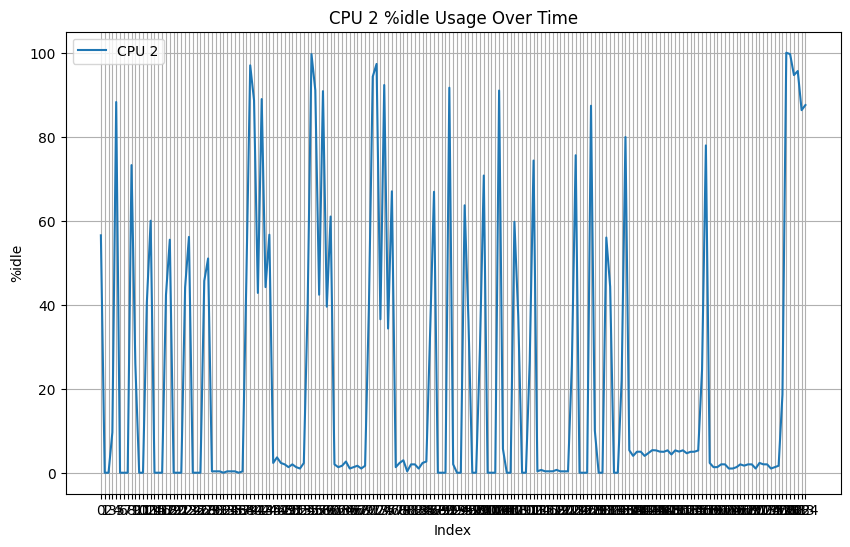

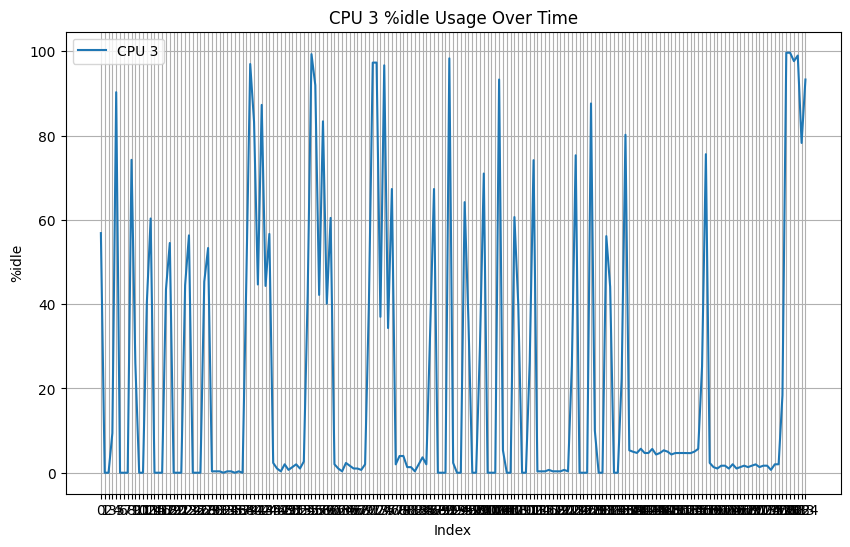

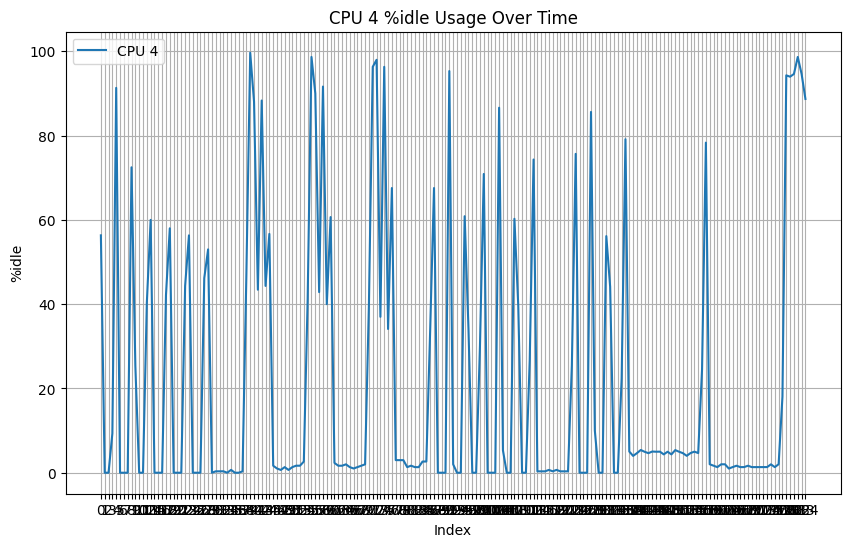

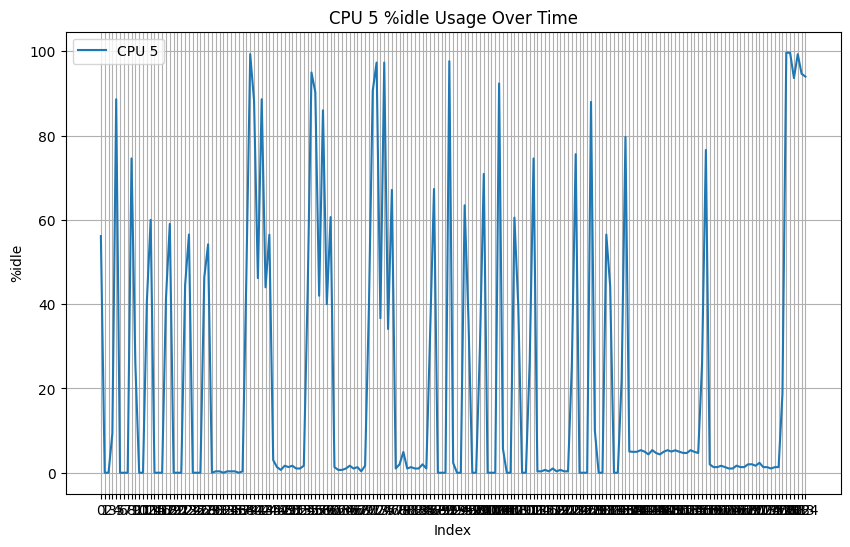

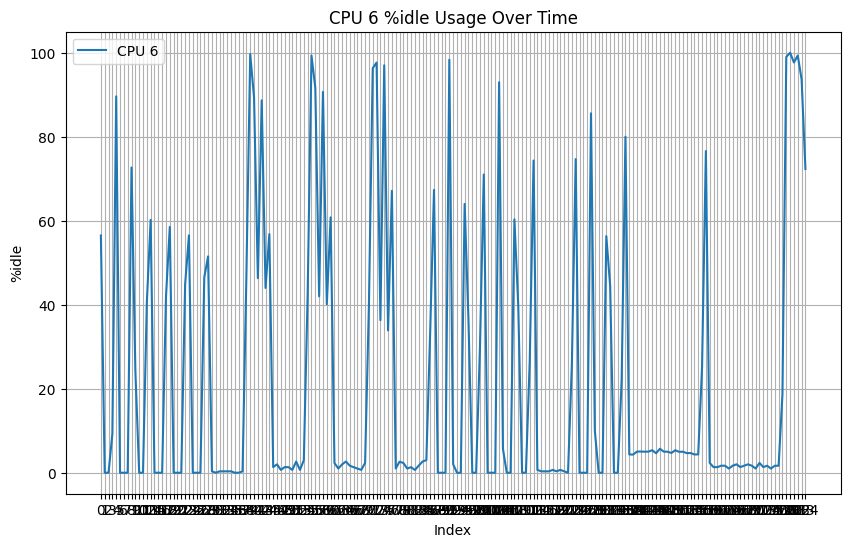

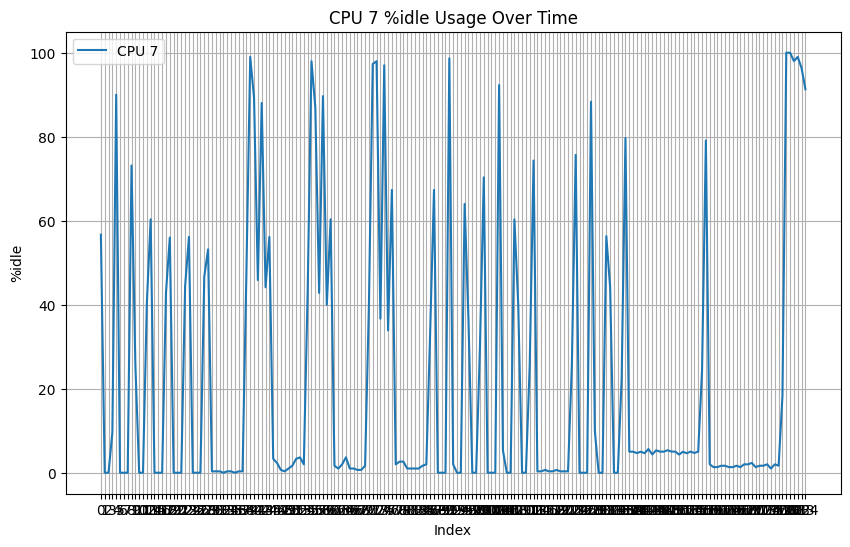

In [113]:
#测试用虚拟机所在主机的数据  172.25.15.33
filter_mpstat_data('mohost.txt', 'filtered_monitor_host.txt')
data_list = parse_mpstat_data("filtered_monitor_host.txt")
for i in range(8):
    plot_cpu_idle_usage(data_list, i,"%guest")

for i in range(8):
    plot_cpu_idle_usage(data_list, i,"%idle")

Filtered data has been written to 'filtered_monitor_vm.txt'


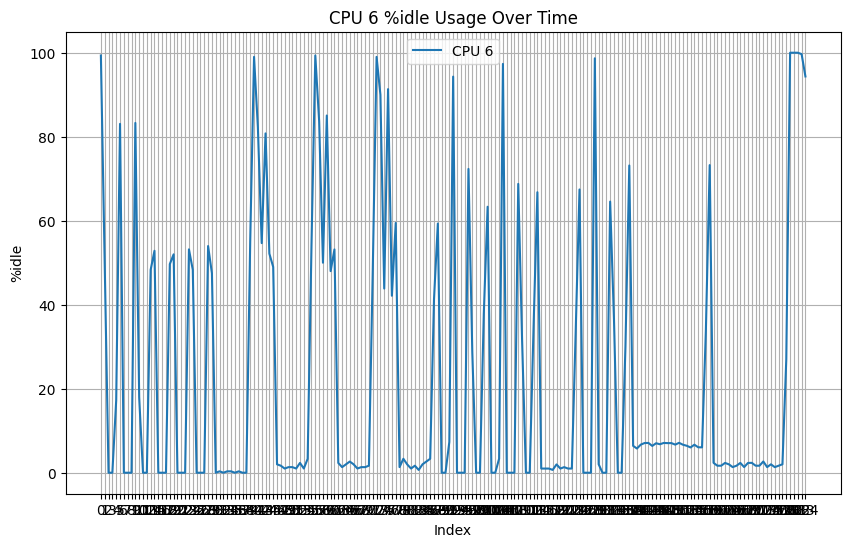

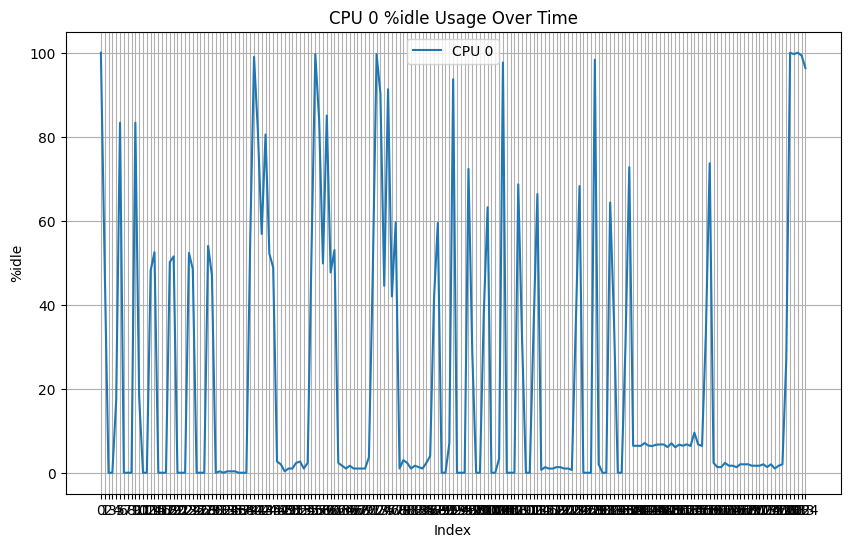

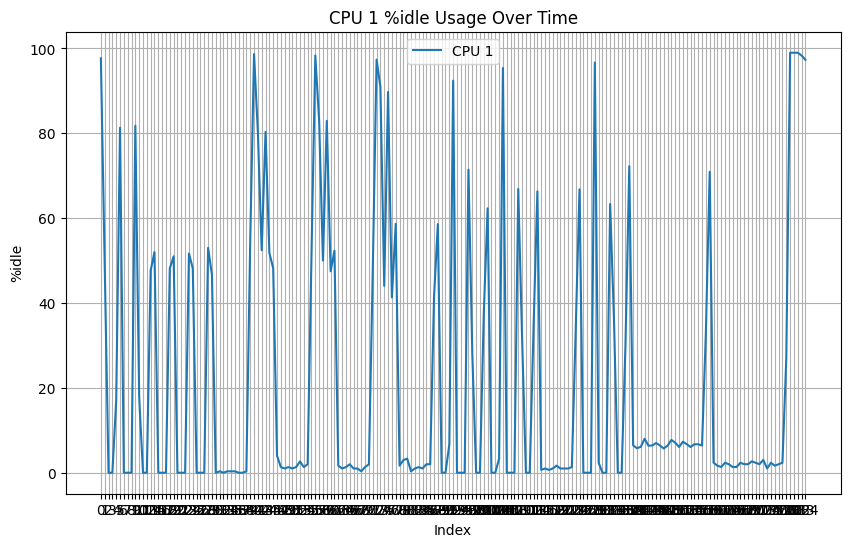

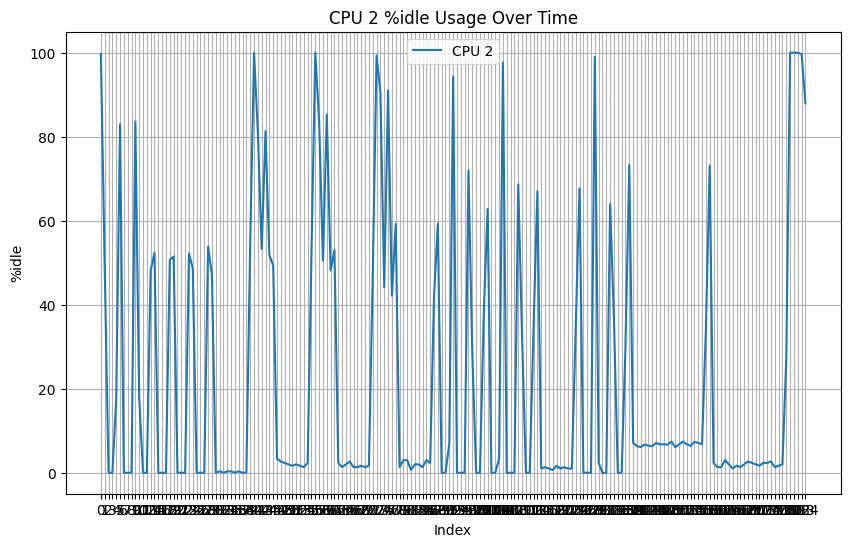

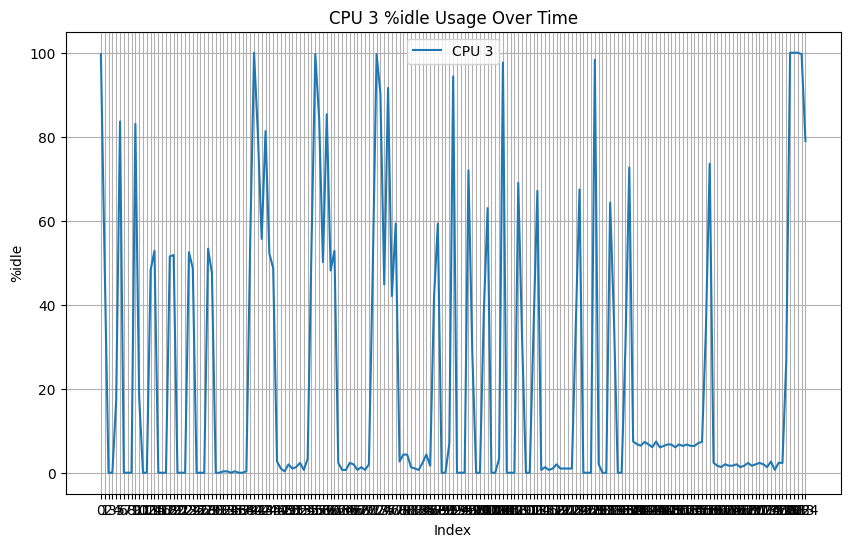

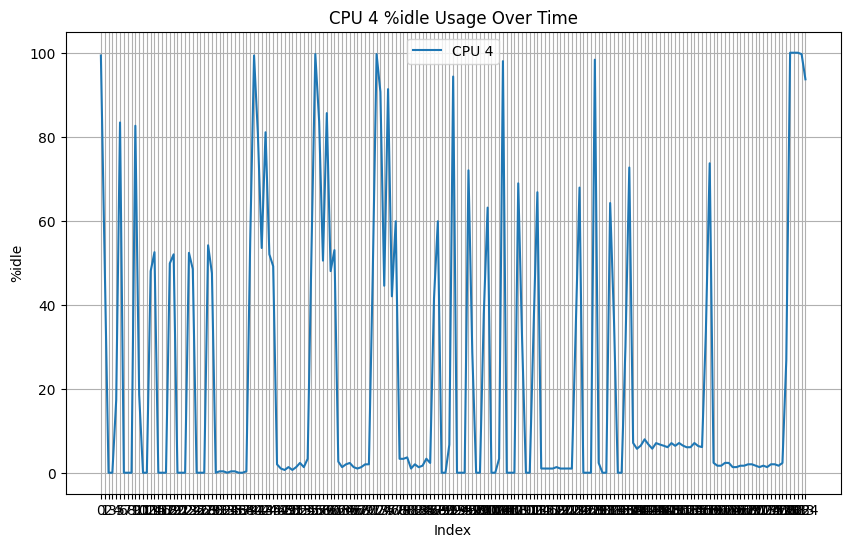

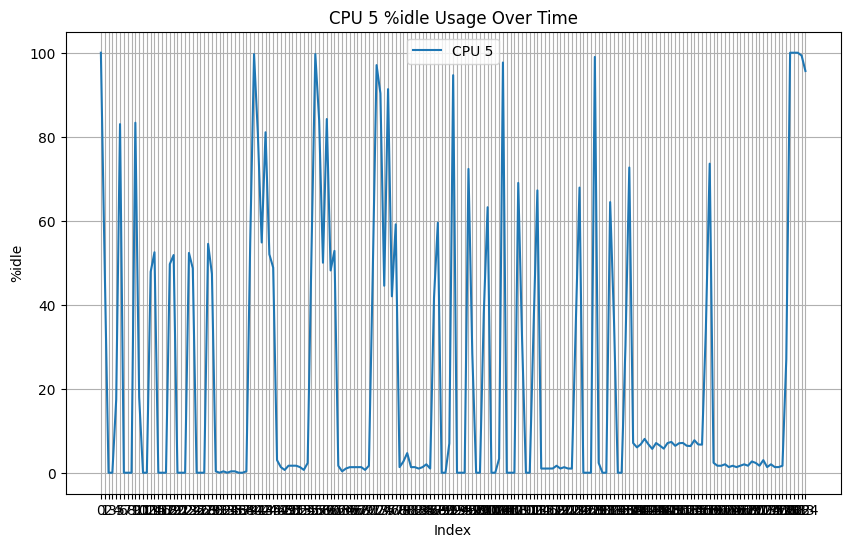

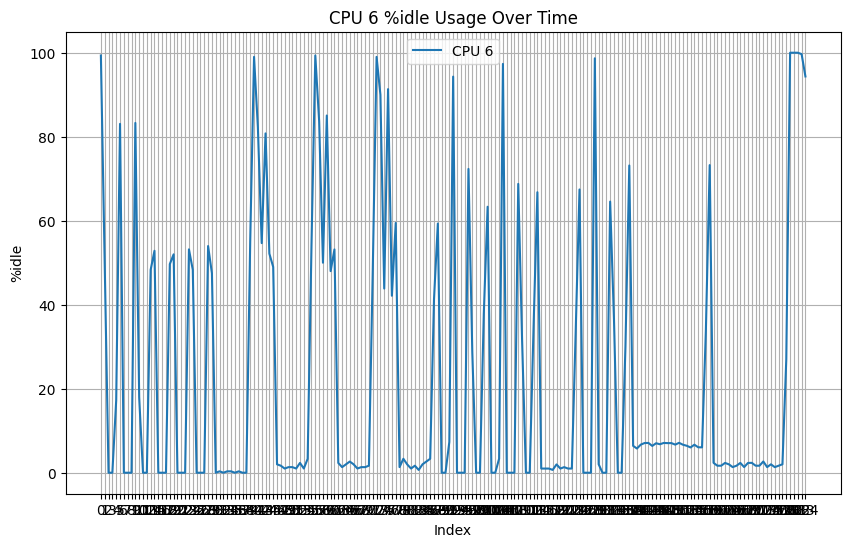

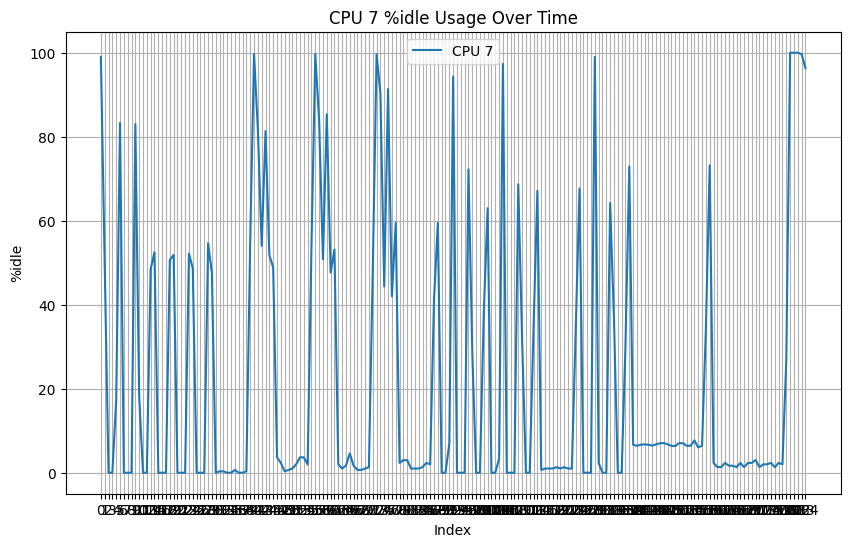

In [112]:
#测试用虚拟机的数据       172.25.131.93
filter_mpstat_data('movm.txt', 'filtered_monitor_vm.txt')
data_list = parse_mpstat_data("filtered_monitor_vm.txt")
plot_cpu_idle_usage(data_list, 6,"%idle")#6-13
for i in range(8):
    plot_cpu_idle_usage(data_list, i,"%idle")

In [ ]:
mn节点 172.25.16.23


周2 6.5-9          2.5小时
周三 6.5-8.5       2小时
周四 6.5-9  10-5   9.5小时
周天  11-12 13-19  7小时
合计  21小时 




mount -o username=smb,password=password //192.168.200.100/share /mnt/
 yum install samba-client -y
 

In [ ]:
smbclient //192.168.200.100/share -U smb%password
cd lei.zhang
put mohost.txt

In [ ]:
#!/bin/bash

# 文件名
logfile="moho.txt"

# 检查文件是否存在
if [ -f "$logfile" ]; then
    # 删除文件
    rm -f "$logfile"
fi

# 运行 mostat 命令并将输出重定向到文件和终端
mpstat -P ALL 3 | tee "$logfile"

In [ ]:
taskset -c   6-13 ./Run   -c   8    -i    3  

In [ ]:
taskset -c   0-7 ./Run   -c   8    -i    3  

172.25.12.167    物理机器

In [ ]:
 172.25.131.93    虚拟机 测试机器

 172.25.16.210    虚拟机所在HOST